In [ ]:
import zipfile
import cv2
import numpy as np
import os

# Function to load images from a ZIP file
def load_images_from_zip(zip_path, image_size=(64, 64)):
    """
    Load images from a ZIP file, resize them, and return as an array.
    Args:
        zip_path (str): Path to the ZIP file.
        image_size (tuple): Desired image size (width, height).

    Returns:
        np.array: Array of images.
        list: List of filenames.
    """
    images = []
    filenames = []

    # Open the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Iterate through each file in the ZIP archive
        for file_name in zip_ref.namelist():
            # Check if the file is an image based on its extension
            if file_name.endswith(('png', 'jpg', 'jpeg')):
                with zip_ref.open(file_name) as file:
                    # Read the image
                    file_data = np.frombuffer(file.read(), np.uint8)
                    img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)

                    # Check if the image was successfully read
                    if img is not None:
                        # Resize the image
                        img = cv2.resize(img, image_size)
                        images.append(img)
                        filenames.append(file_name)
                    else:
                        print(f"Warning: Could not read file {file_name} as an image.")

    return np.array(images), filenames

# Path to the ZIP file
zip_path = "/tango-cv-assessment-dataset.zip"

# Load the images from the ZIP file
image_data, filenames = load_images_from_zip(zip_path)

# Verify the loaded images
print(f"Loaded {len(image_data)} images.")


Loaded 25259 images.


Loaded 25259 images.


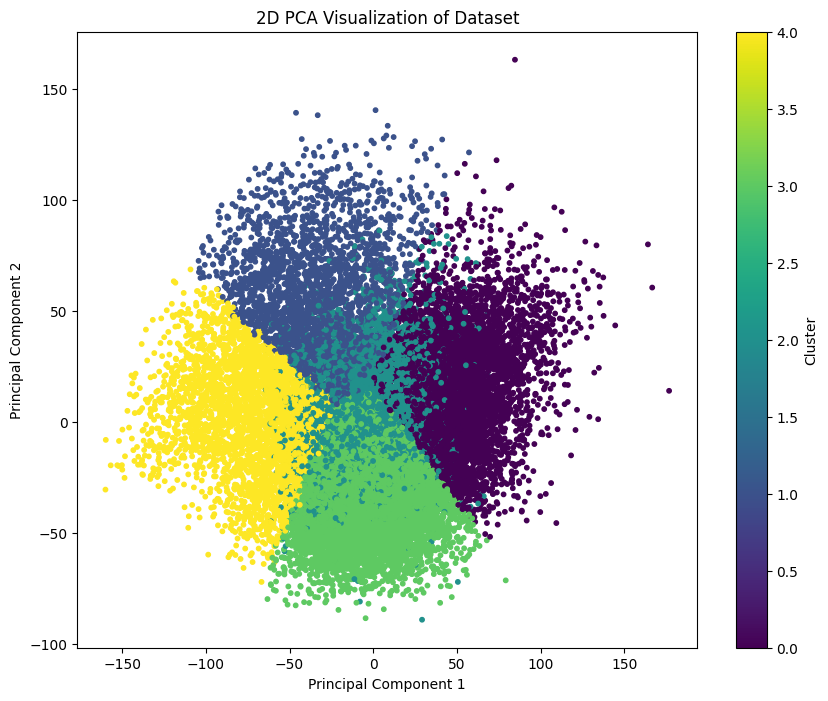

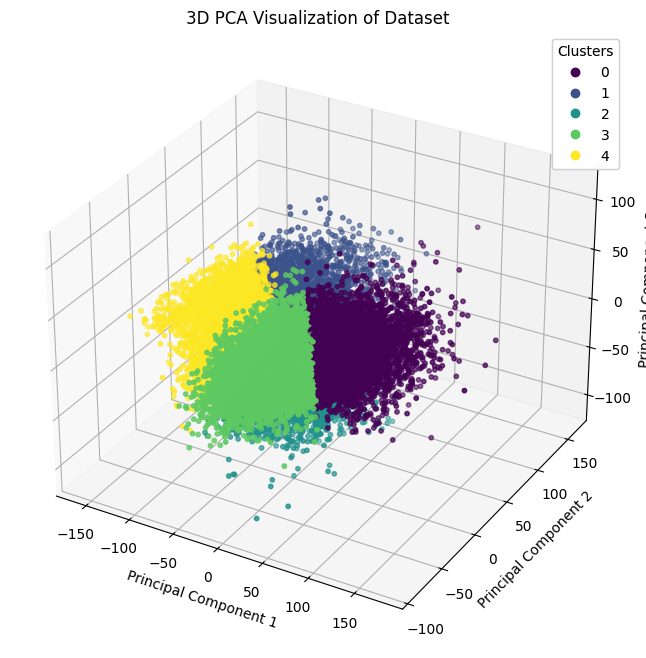

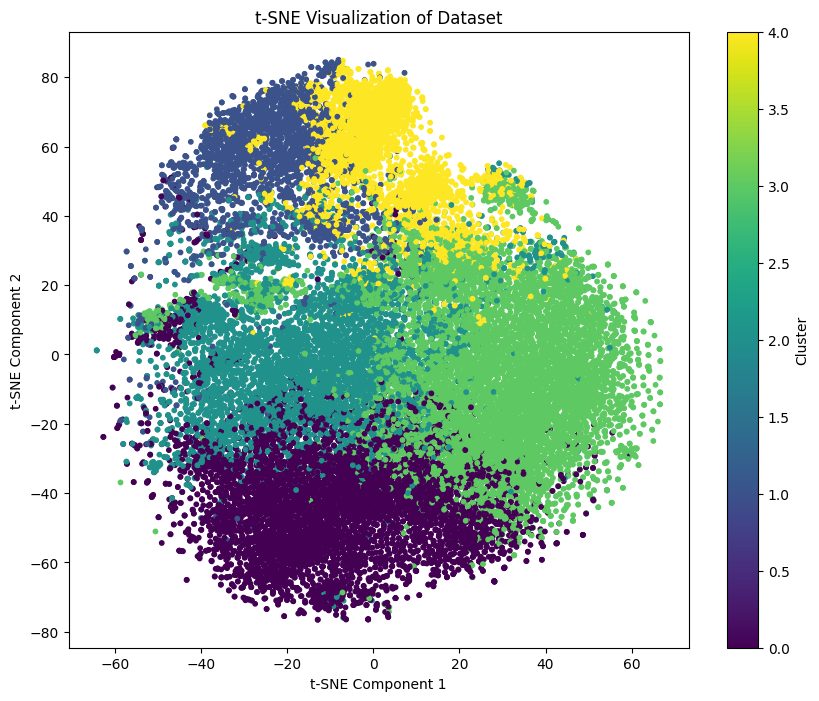

In [ ]:
import zipfile
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Load Images from ZIP File
def load_images_from_zip(zip_path, image_size=(64, 64)):
    """
    Load images from a ZIP file, resize them, and return as an array.
    Args:
        zip_path (str): Path to the ZIP file.
        image_size (tuple): Desired image size (width, height).

    Returns:
        np.array: Array of images.
        list: List of filenames.
    """
    images = []
    filenames = []

    # Open the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.endswith(('png', 'jpg', 'jpeg')):
                with zip_ref.open(file_name) as file:
                    file_data = np.frombuffer(file.read(), np.uint8)
                    img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
                    if img is not None:
                        img = cv2.resize(img, image_size)
                        images.append(img)
                        filenames.append(file_name)
                    else:
                        print(f"Warning: Could not read file {file_name} as an image.")
    return np.array(images), filenames

# Path to the ZIP file
zip_path = "/tango-cv-assessment-dataset.zip"

# Load the images
image_data, filenames = load_images_from_zip(zip_path)
print(f"Loaded {len(image_data)} images.")

# 2. Preprocess the Data
# Flatten the images for clustering and visualization
flat_data = image_data.reshape(len(image_data), -1)

# Standardize the data
scaler = StandardScaler()
flat_data_scaled = scaler.fit_transform(flat_data)

# 3. Perform Clustering (KMeans)
n_clusters = 5  # Adjust based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(flat_data_scaled)

# 4. Dimensionality Reduction for Visualization
def reduce_dimensions(data, n_components=2, method="PCA"):
    """
    Reduce dimensions of the data using PCA or t-SNE.
    Args:
        data (np.array): Data to reduce.
        n_components (int): Number of dimensions to reduce to.
        method (str): Dimensionality reduction method ("PCA" or "t-SNE").

    Returns:
        np.array: Reduced data.
    """
    if method == "PCA":
        reducer = PCA(n_components=n_components)
    elif method == "t-SNE":
        reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError("Unsupported method")
    return reducer.fit_transform(data)

# Reduce dimensions for 2D visualization
reduced_data_2d = reduce_dimensions(flat_data_scaled, n_components=2, method="PCA")

# Plot 2D Visualization
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=cluster_labels, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("2D PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Reduce dimensions for 3D visualization
reduced_data_3d = reduce_dimensions(flat_data_scaled, n_components=3, method="PCA")

# Plot 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                      c=cluster_labels, cmap="viridis", s=10)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.title("3D PCA Visualization of Dataset")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

# Optional: t-SNE for non-linear embedding
reduced_data_tsne = reduce_dimensions(flat_data_scaled, n_components=2, method="t-SNE")

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap="viridis", s=10)
plt.colorbar(label="Cluster")
plt.title("t-SNE Visualization of Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
